In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 19 13:11:46 2020

@author: Michael
"""
# First we import the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
########################### CLASS FOR RBF MODEL ###############################

# we are going to create a class to create our RBF model + test/train split function
class RBF:
    def __init__(self, input_data, RBF_clusters, output_labels,sigma):
        
        # store the input data, and output_labels
        self.input_data = input_data
        self.output_labels = output_labels
        self.clusters = RBF_clusters      
        self.sigma = sigma
        
        # Generate G with the inputs and our clusters
        self.G = self.generate_hidden()
        
        # Generate W with the equation (GTG)-1GT * D
        G1 = np.dot(np.transpose(self.G),self.G)
        G2 = np.linalg.inv(G1)
        G3 = np.dot(G2,np.transpose(self.G))
        self.W = np.dot(G3,self.output_labels)

    def activation(self,x,g):
        return(np.exp(-self.euclidean_distance(x,g)**2/2*self.sigma**2))
    
    def euclidean_distance(self,p,q):
        return(np.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2))
        
    def generate_hidden(self):
        G = np.zeros([len(self.input_data),len(self.clusters)])
        for i in range(len(self.input_data)):
            for j in range(len(self.clusters)):
                G[i][j] = self.activation(self.input_data[i],self.clusters[j])
        return(G)

    def predict(self,x_test):
        self.input_data = x_test
        self.G = self.generate_hidden()
        predictions = np.dot(self.G,self.W)
        
        return(predictions)
    
    def get_acc(self, y_pred,y):
        Accuracy = 0
        for x,y in zip(y_pred, y):
            if np.argmax(x) == np.argmax(y):
                Accuracy = Accuracy + 1
        return(Accuracy/len(y_pred)*100)
        
        
    def MSE(self,y_pred,y):
        return(((y_pred - y)**2).mean(axis=0)[0])
    
    def normalize(self,v):
        norm = np.linalg.norm(v)
        if norm == 0: 
            return v
        return v / norm

def test_train_split(train_data,train_labels,Split):
    
    Train_size = round(len(train_data)*Split)
    
    # random permutation of the data in order to create a validation/test sets
    idx = np.random.permutation(train_data.shape[0])
    training_idx, test_idx = idx[:Train_size], idx[Train_size:]
    x_train, x_test = train_data[training_idx,:], train_data[test_idx,:]
    y_train, y_test = train_labels[training_idx,:], train_labels[test_idx,:]
    return(x_train,y_train,x_test, y_test)

# PART 1

In [4]:
# Set the random seed value and define initial variables

random.seed(1)
X = []
output_labels = np.zeros([441,1])
MSE_train = []
MSE_test = []

In [5]:
## Create dataset using equation from assignment and then shuffle output
X = []
x = 0
for i in range(21):
    for j in range(21):
        x1 = -2+0.2*i
        x2 = -2+0.2*j
        X.append([x1,x2])
        if((x1**2+x2**2)<=1):
            output_labels[x][0] = 1
        if((x1**2+x2**2)>1):
            output_labels[x][0] = -1
        x = x + 1

idx = np.random.permutation(len(X))
X = np.array(X)[idx]
Y = output_labels[idx]

In [6]:
# Now create the test/train split of 80/20

x_train,y_train,x_test, y_test = test_train_split(X,Y,0.8)

In [7]:
# Now loop through various values of sigma and train the RBF network on the 
# training data. The output is calculated through predicting both sets where 
# sigma takes a broad range of values


for sigma in np.arange(0.1,5,0.1): 
    RBF_obj = RBF(x_train,x_train,y_train,sigma)
    output_test = RBF_obj.predict(x_test)
    output_train = RBF_obj.predict(x_train)
    MSE_test.append(RBF_obj.MSE(output_test,y_test))
    MSE_train.append(RBF_obj.MSE(output_train,y_train))
    print("############   Sigma = " + str(sigma) + "   ############")
    print("Training data MSE: " + str(RBF_obj.MSE(output_train,y_train)))
    print("Test data MSE: " + str(RBF_obj.MSE(output_test,y_test)))

############   Sigma = 0.1   ############
Training data MSE: 1.0879413671028026
Training data MSE: 1.003322343882015
############   Sigma = 0.2   ############
Training data MSE: 1563.7204493514228
Training data MSE: 1484.5503482416586
############   Sigma = 0.30000000000000004   ############
Training data MSE: 636.4781047263913
Training data MSE: 576.9095398327377
############   Sigma = 0.4   ############
Training data MSE: 105.47551982882568
Training data MSE: 93.08978851090816
############   Sigma = 0.5   ############
Training data MSE: 593.9632672782699
Training data MSE: 721.8562673255487
############   Sigma = 0.6   ############
Training data MSE: 118.77754788524658
Training data MSE: 153.85625782539825
############   Sigma = 0.7000000000000001   ############
Training data MSE: 137.78461956472472
Training data MSE: 159.89168013160509
############   Sigma = 0.8   ############
Training data MSE: 385.47208249794045
Training data MSE: 398.71654783556966
############   Sigma = 0.9   ##

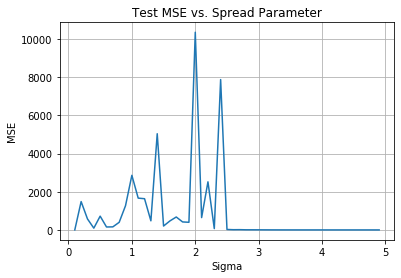

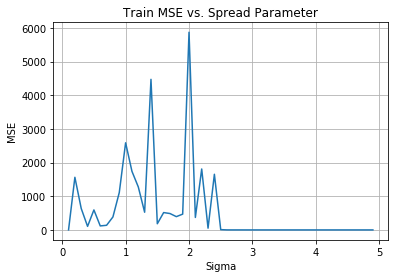

In [8]:
# plot predicted vs actual MSE results as sigma varies for both test/train data

# TEST PLOT
sigma = np.arange(0.1,5,0.1)
fig,ax = plt.subplots()
ax.plot(sigma,MSE_test)
ax.set(xlabel='Sigma',ylabel='MSE',
      title='Test MSE vs. Spread Parameter')
ax.grid()

fig.savefig("Q3_Part1_test.png")
plt.show()

# TRAIN PLOT
fig,ax = plt.subplots()
ax.plot(sigma,MSE_train)
ax.set(xlabel='Sigma',ylabel='MSE',
      title='Train MSE vs. Spread Parameter')
ax.grid()

fig.savefig("Q3_Part1_train.png")
plt.show()

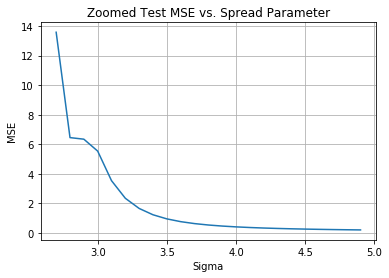

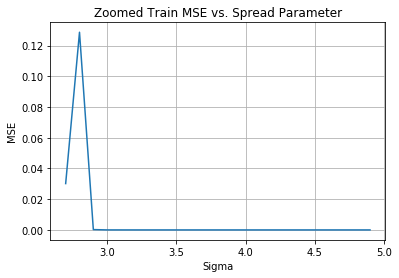

In [9]:
#=============================================================================
# Lets examine the MSE after 2.2 to get a better sense for the transition zone

fig,ax = plt.subplots()
ax.plot(sigma[26:],MSE_test[26:])
ax.set(xlabel='Sigma',ylabel='MSE',
      title='Zoomed Test MSE vs. Spread Parameter')
ax.grid()

fig.savefig("Q3_Part1_test_Zoom.png")
plt.show()

fig,ax = plt.subplots()
ax.plot(sigma[26:],MSE_train[26:])
ax.set(xlabel='Sigma',ylabel='MSE',
      title='Zoomed Train MSE vs. Spread Parameter')
ax.grid()

fig.savefig("Q3_Part1_train_Zoom.png")
plt.show()

# PART 2

In [10]:
# Keep sigma at 3.5 from part 1

sigma = 3.5

In [11]:
# Calculate clusters through random selection
Num_Clusters = 150
idx = np.random.permutation(len(x_train))[:Num_Clusters]
clusters1 = [x_train[i,:] for i in idx]

In [12]:
# Calculate clusters through k-means
clusters2 = KMeans(n_clusters=Num_Clusters,random_state=1).fit(x_train).cluster_centers_

In [13]:
# Create the two models based on random clusters and kmeans clusters

RBF_Rand = RBF(x_train,clusters1,y_train,sigma)
RBF_Kmeans = RBF(x_train,clusters2,y_train,sigma)

In [14]:
# Predict outputs on training data and test data

output_Rand_train = RBF_Rand.predict(x_train)
output_Kmeans_train = RBF_Kmeans.predict(x_train)

output_Rand_test = RBF_Rand.predict(x_test)
output_Kmeans_test = RBF_Kmeans.predict(x_test)

In [15]:
# Calculate MSE for outputs

MSE_Rand_train = RBF_Rand.MSE(output_Rand_train,y_train)
MSE_Kmeans_train = RBF_Kmeans.MSE(output_Kmeans_train,y_train)

MSE_Rand_test = RBF_Rand.MSE(output_Rand_test,y_test)
MSE_Kmeans_test = RBF_Kmeans.MSE(output_Kmeans_test,y_test)

print("Random Cluster Selection Train MSE: ", MSE_Rand_train)
print("K-means Cluster Selection Train MSE: ", MSE_Kmeans_train)

print("Random Cluster Selection Test MSE: ", MSE_Rand_test)
print("K-means Cluster Selection Test MSE: ", MSE_Kmeans_test)

Random Cluster Selection Train MSE:  0.034689420141545434
K-means Cluster Selection Train MSE:  0.038244310235191724
Random Cluster Selection Test MSE:  0.11899626971729446
K-means Cluster Selection Test MSE:  0.12664191839628777


In [16]:
# Now vary sigma again, and create multiple models just to further compare the two methods

MSE_train_rand = []
MSE_train_kmeans = []
MSE_test_rand = []
MSE_test_kmeans = []

for sigma in np.arange(0.5,3.5,0.1): 
    RBF_Rand = RBF(x_train,clusters1,y_train,sigma)
    RBF_Kmeans = RBF(x_train,clusters2,y_train,sigma)

    output_Rand_train = RBF_Rand.predict(x_train)
    output_Kmeans_train = RBF_Kmeans.predict(x_train)
    
    output_Rand_test = RBF_Rand.predict(x_test)
    output_Kmeans_test = RBF_Kmeans.predict(x_test)

    MSE_train_rand.append(RBF_Rand.MSE(output_Rand_train,y_train))
    MSE_train_kmeans.append(RBF_Kmeans.MSE(output_Kmeans_train,y_train))
    
    MSE_test_rand.append(RBF_Rand.MSE(output_Rand_test,y_test))
    MSE_test_kmeans.append(RBF_Kmeans.MSE(output_Kmeans_test,y_test))
    
    print("Random Cluster Selection Train MSE: ", RBF_Rand.MSE(output_Rand_train,y_train))
    print("K-means Cluster Selection Train MSE: ", RBF_Kmeans.MSE(output_Kmeans_train,y_train))

    print("Random Cluster Selection Test MSE: ", RBF_Rand.MSE(output_Rand_test,y_test))
    print("K-means Cluster Selection Test MSE: ", RBF_Kmeans.MSE(output_Kmeans_test,y_test))

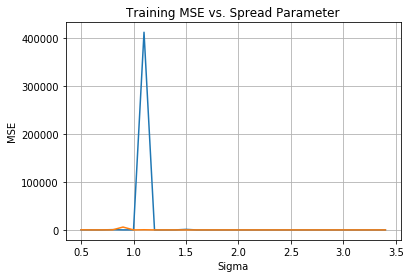

In [17]:
# Plot training results

sigma = np.arange(0.5,3.5,0.1)
fig,ax = plt.subplots()
ax.plot(sigma,MSE_train_rand)
ax.plot(sigma,MSE_train_kmeans)
ax.set(xlabel='Sigma',ylabel='MSE',
      title='Training MSE vs. Spread Parameter')
ax.grid()

fig.savefig("Q3_Part2_Train.png")
plt.show()

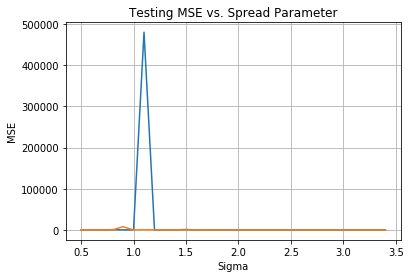

In [18]:
# Plot test results

sigma = np.arange(0.5,3.5,0.1)
fig,ax = plt.subplots()
ax.plot(sigma,MSE_test_rand)
ax.plot(sigma,MSE_test_kmeans)
ax.set(xlabel='Sigma',ylabel='MSE',
      title='Testing MSE vs. Spread Parameter')
ax.grid()

fig.savefig("Q3_Part2_Test.png")
plt.show()